### Supervised Machine Learning
- The learning algorithms that solve problem by using datasets to train models in such a way that every instance has its corresponding label in the dataset.
- The model is supposed to have learnt to estimate a mapping function <i> y = f(X) </i> where X consists of input variables and y is the target variable so that it could provide prediction for every instances of input variables.
- These algorithms could be used to solve either a classification problem or a regression problem.
- Both of these problems have the same goal of constructing a model that could predict the target variable, but, the target variable is continuous (takes numerical values) in the regression problem whereas the target variable is categorical in the classification problem.

### Using the same data but different approaches - Regression
### Boston Housing Prediction
#### Problem Definition
Problem: Boston House Price Prediction
- The goal is to predict the price of houses in Boston area.
- Since we are not exactly partitioning our dataset into a fixed number of classes, but rather using the predictors to estimate the prices of houses, the problem is a regression problem.
Relevant Dataset: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices/data?select=housing.csv
##### Data Description:
| Attribute | Description |
| --- | --- |
| crim | per capita crime rate by town |
| zn | proportion of residential land zoned for lots over 25,000sq.ft |
| indus | proportion of non-retai business acres per town |
| chas | Charles River dummy variable (=1 if tract bounds river; 0 otherwise) |
| nox | nitric oxides concentration (parts per 10 million) |
| rm | average number of rooms per dwelling |
| age | proportion of owner-occupied units built prior to 1940 |
| dis | weighted distances to five Boston employment centers |
| rad | index of accessibility to radial highways |
| tax | full-value property-tax rate per USD 10,000 |
| ptratio | pupil-teacher ratio by town |
| b | 1000(B-0.63)^2 where B is the proportion of blacks by town |
| lstat | percentage of lower status of the population |
| medv | median value of owner-occupied homes in USD 1000’s |

#### Import all necessary libraries

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

#### Load and Explore the Data

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('./Boston_housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.dataframeName = 'housing.csv'
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 506 rows and 14 columns


In [3]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


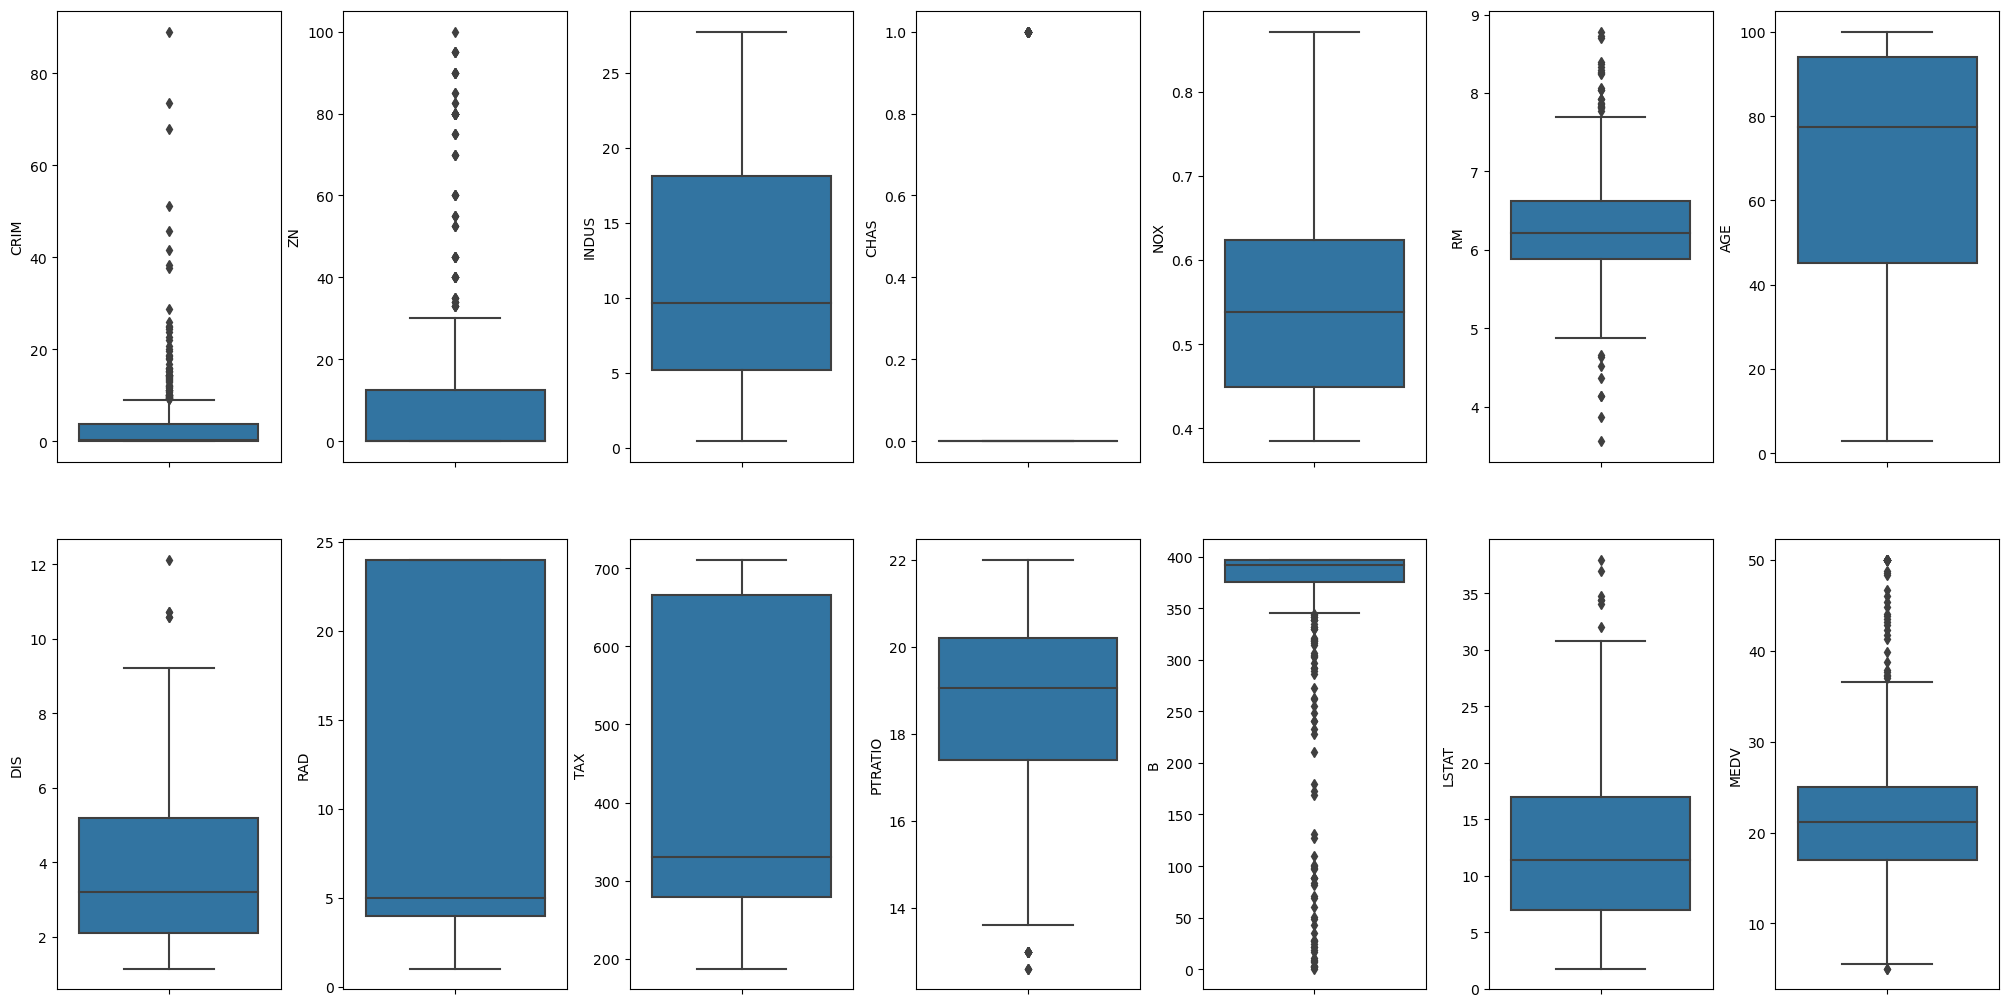

In [5]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [6]:
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [7]:
data = data[~(data['MEDV'] >= 50.0)]
print(data.shape)

(490, 14)


C:\Users\smbtk\AppData\Local\Temp\ipykernel_15532\2662893558.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\smbtk\AppData\Local\Temp\ipykernel_15532\2662893558.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\smbtk\AppData\Local\Temp\

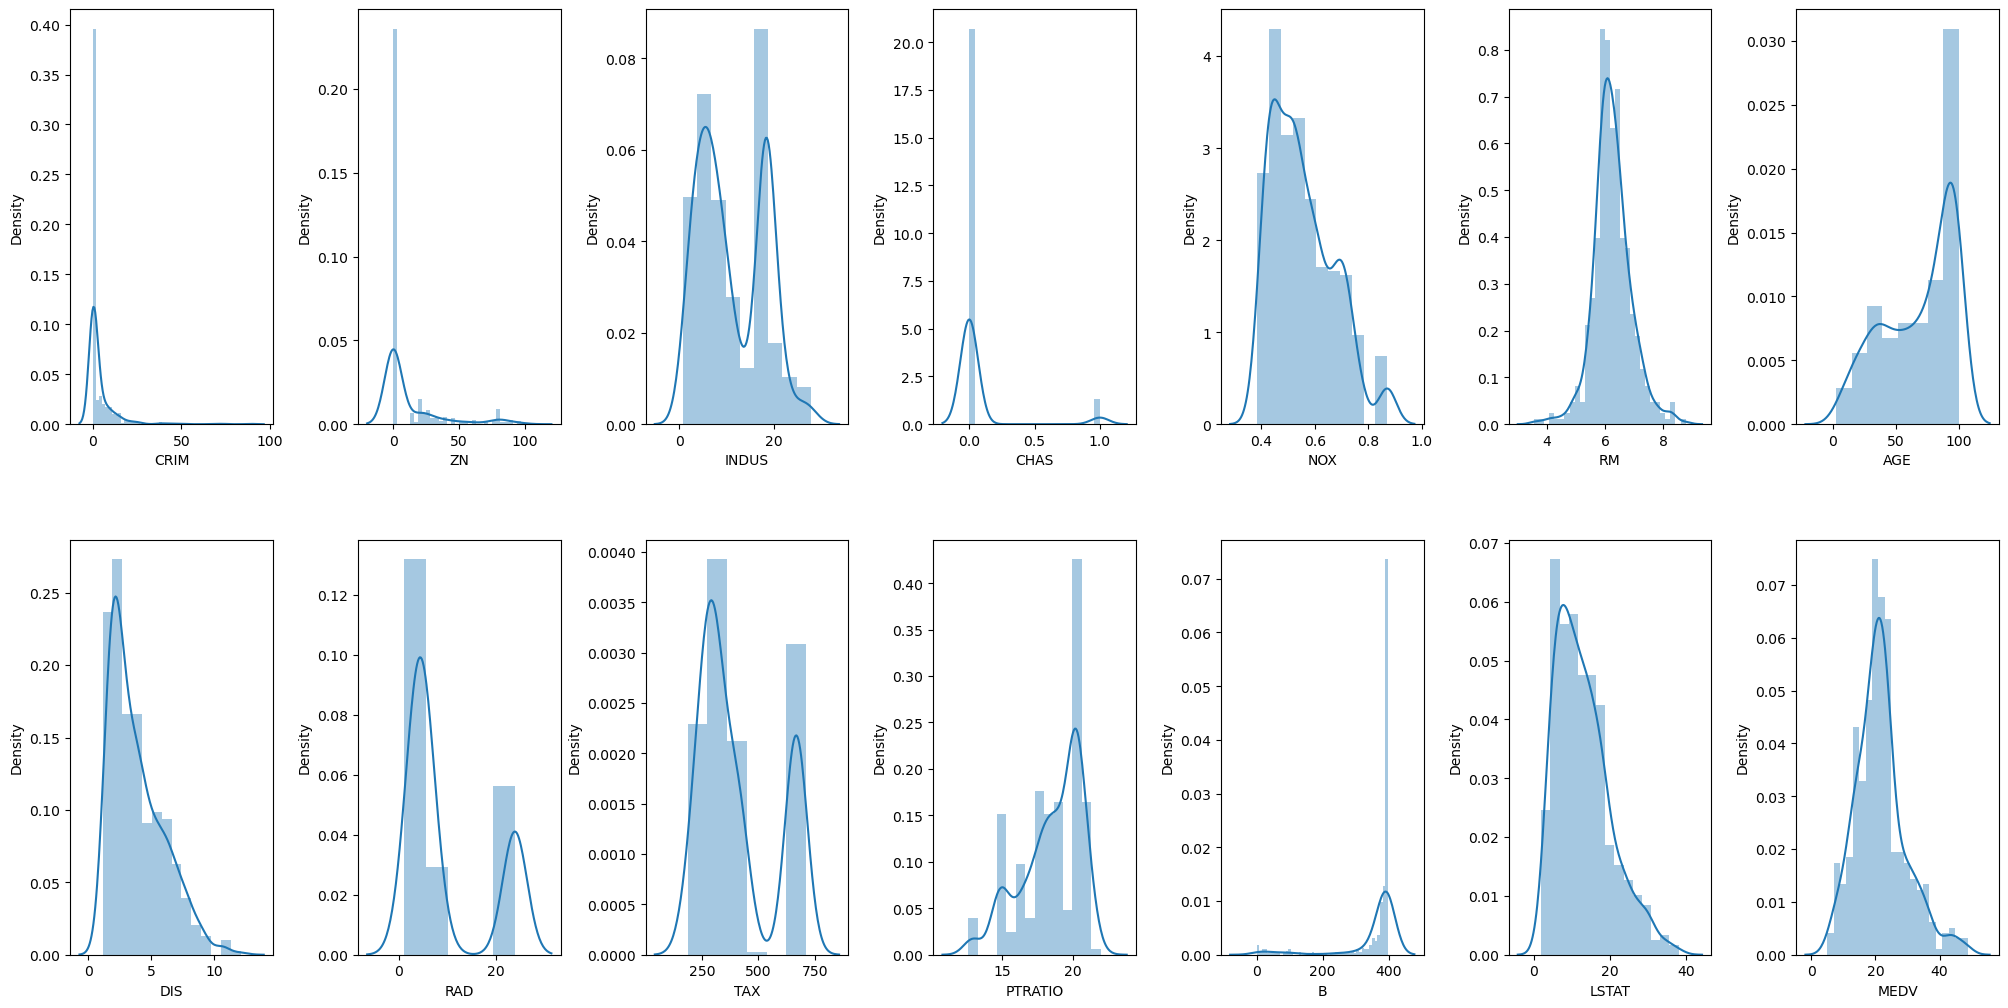

In [8]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<Axes: >

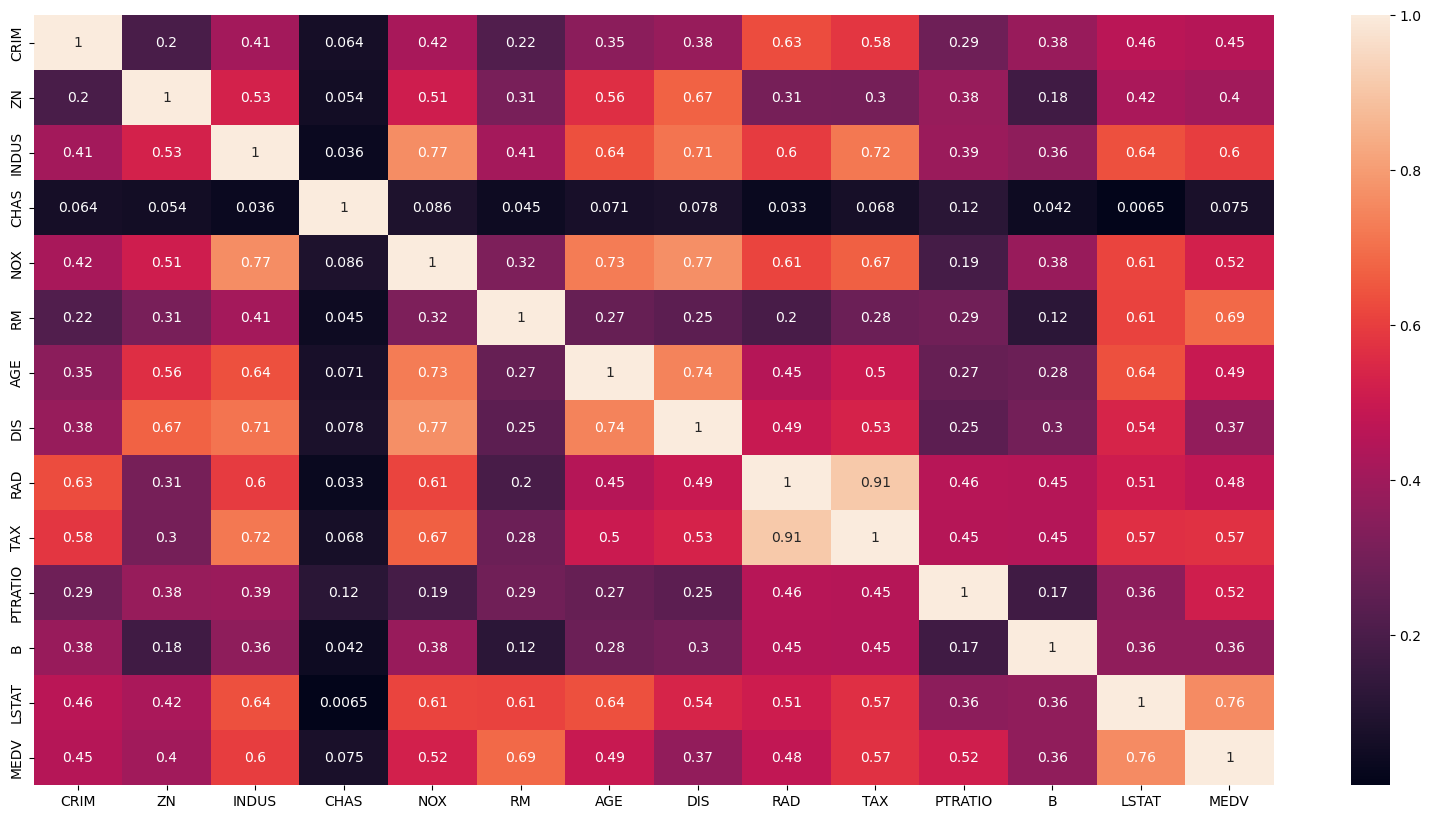

In [9]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

#### Data Preparation for Training and Testing

      LSTAT     INDUS       NOX   PTRATIO        RM       TAX       DIS  \
0  0.083356  0.058148  0.314815  0.287234  0.577505  0.208015  0.268711   
1  0.198944  0.234444  0.172840  0.553191  0.547998  0.104962  0.348524   
2  0.056960  0.234444  0.172840  0.553191  0.694386  0.104962  0.348524   
3  0.026674  0.053333  0.150206  0.648936  0.658555  0.066794  0.448173   
4  0.093081  0.053333  0.150206  0.648936  0.687105  0.066794  0.448173   

        AGE  
0  0.641607  
1  0.782698  
2  0.599382  
3  0.441813  
4  0.528321  


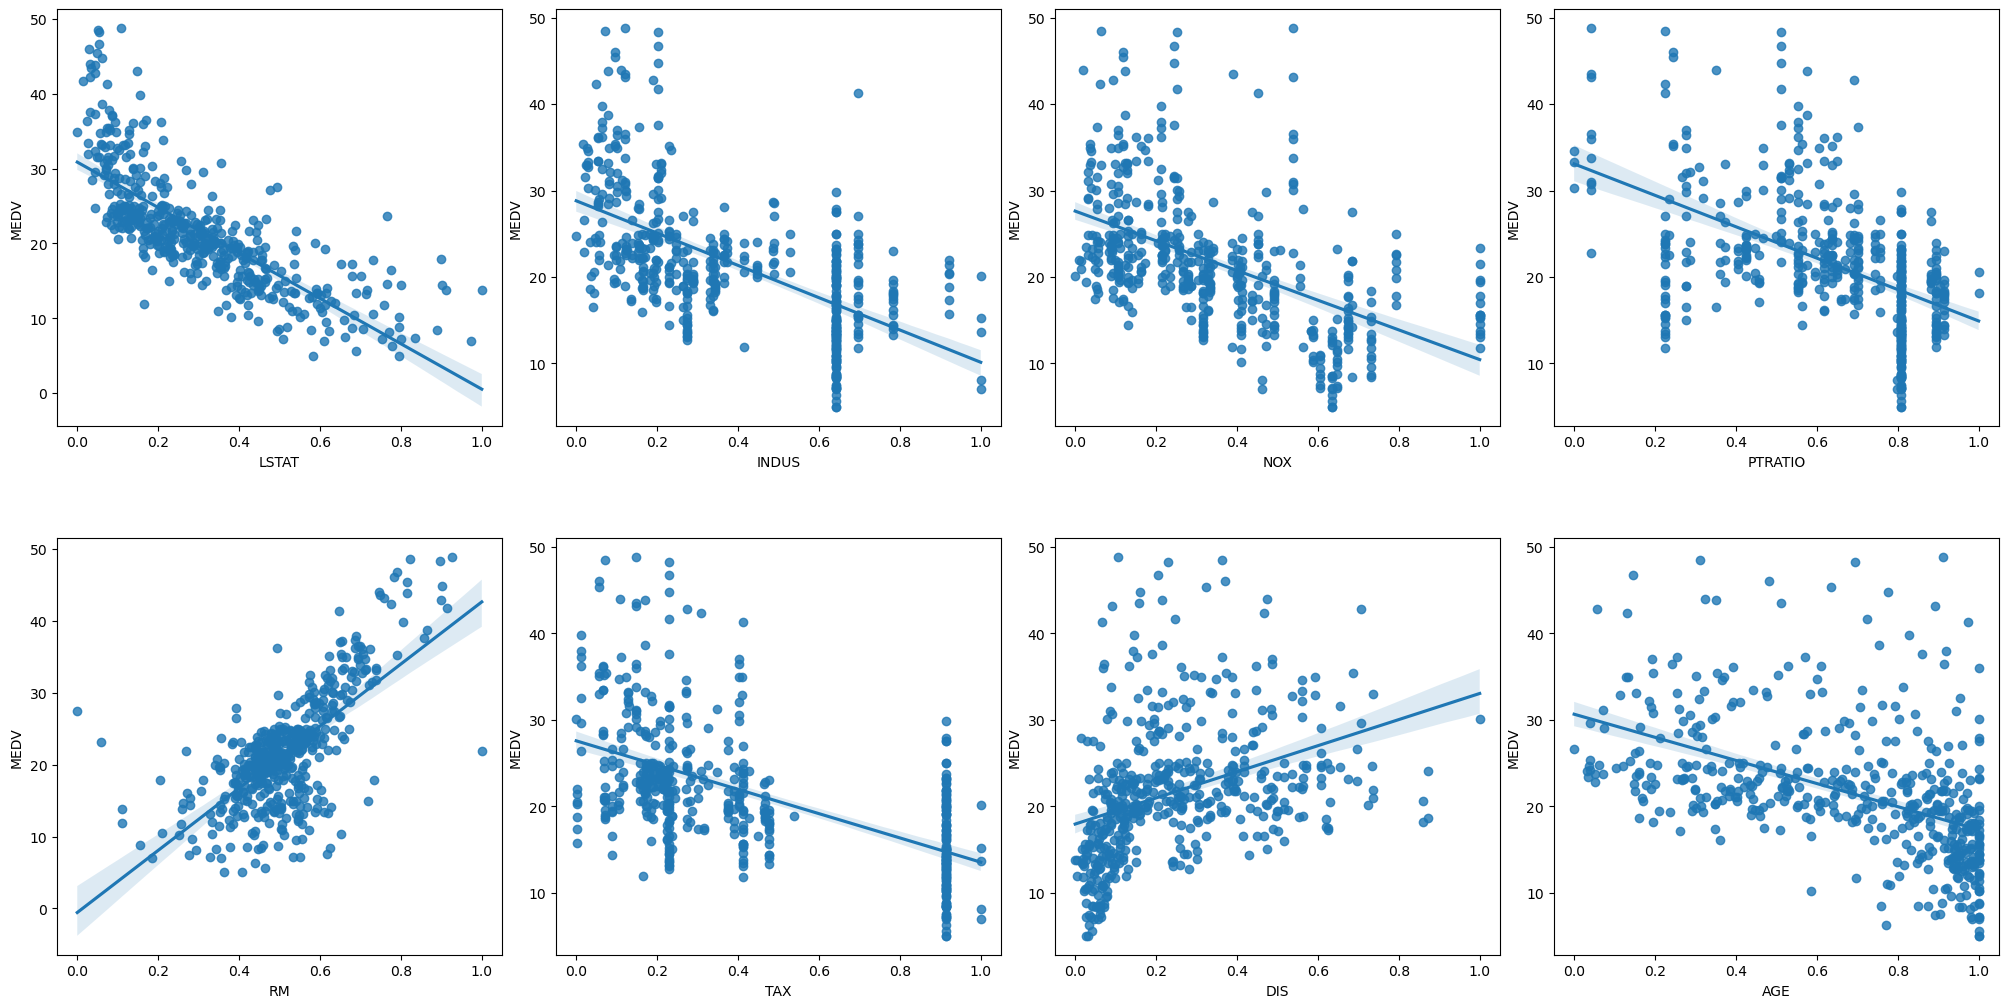

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
print(x.head())
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# split into train test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

#### Select and build the model

In [11]:
l_regression = linear_model.LinearRegression()

#### Train the model

In [12]:
l_regression.fit(x_train, y_train)

LinearRegression()

#### Make predictions

In [13]:
reg_pred_train = l_regression.predict(x_train)
reg_pred_test = l_regression.predict(x_test)

#### Evaluate the results

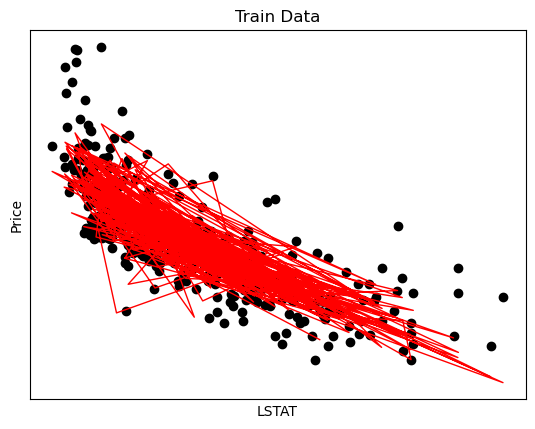

In [14]:
# Plot outputs 
plt.scatter(x_train.LSTAT, y_train,  color='black') 
plt.title('Train Data') 
plt.xlabel('LSTAT') 
plt.ylabel('Price') 
plt.xticks(()) 
plt.yticks(()) 
plt.plot(x_train.LSTAT, reg_pred_train, color='red',linewidth=1) 
plt.show() 

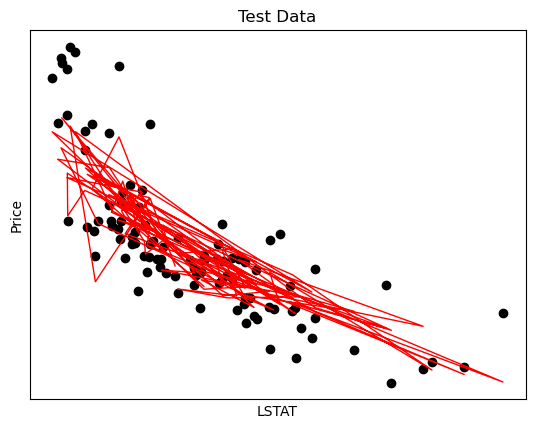

In [15]:
# Plot outputs 
plt.scatter(x_test.LSTAT, y_test,  color='black') 
plt.title('Test Data') 
plt.xlabel('LSTAT') 
plt.ylabel('Price') 
plt.xticks(()) 
plt.yticks(()) 
plt.plot(x_test.LSTAT, reg_pred_test, color='red',linewidth=1) 
plt.show() 

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
scores = []
scores.append([round(mean_squared_error(y_train, reg_pred_train), 2), round(r2_score(y_train, reg_pred_train), 2)])
scores.append([round(mean_squared_error(y_test, reg_pred_test), 2), round(r2_score(y_test, reg_pred_test), 2)])
scores = pd.DataFrame(scores, columns=['MSE', 'R2'], index=['Training', 'Testing'])
scores

,MSE,R2
Training,14.33,0.75
Testing,19.69,0.75


#### What is the problem here?

#### What to do when the result is worst?
- Tune the model?
- To go with another one?

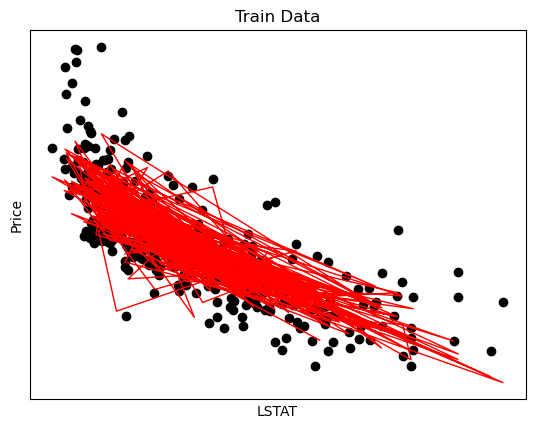

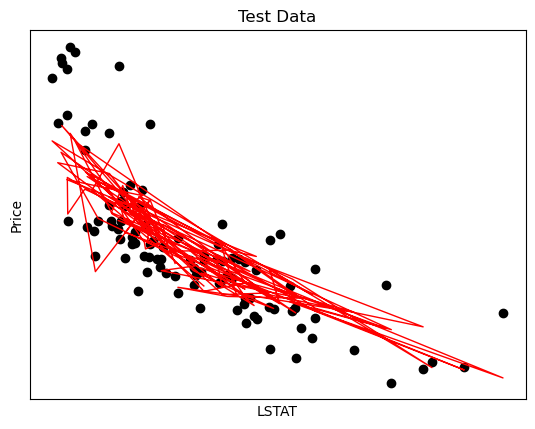

In [17]:
l_ridge = linear_model.Ridge()
l_ridge.fit(x_train, y_train)
reg_pred_train = l_ridge.predict(x_train)
reg_pred_test = l_ridge.predict(x_test)
# Plot outputs 
plt.scatter(x_train.LSTAT, y_train,  color='black') 
plt.title('Train Data') 
plt.xlabel('LSTAT') 
plt.ylabel('Price') 
plt.xticks(()) 
plt.yticks(()) 
plt.plot(x_train.LSTAT, reg_pred_train, color='red',linewidth=1) 
plt.show()
# Plot outputs 
plt.scatter(x_test.LSTAT, y_test,  color='black') 
plt.title('Test Data') 
plt.xlabel('LSTAT') 
plt.ylabel('Price') 
plt.xticks(()) 
plt.yticks(()) 
plt.plot(x_test.LSTAT, reg_pred_test, color='red',linewidth=1) 
plt.show() 

In [18]:
scores = []
scores.append([round(mean_squared_error(y_train, reg_pred_train), 2), round(r2_score(y_train, reg_pred_train), 2)])
scores.append([round(mean_squared_error(y_test, reg_pred_test), 2), round(r2_score(y_test, reg_pred_test), 2)])
scores = pd.DataFrame(scores, columns=['MSE', 'R2'], index=['Training', 'Testing'])
scores

,MSE,R2
Training,14.51,0.75
Testing,20.65,0.74


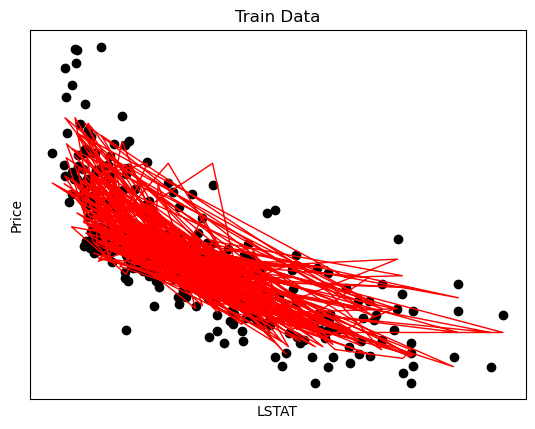

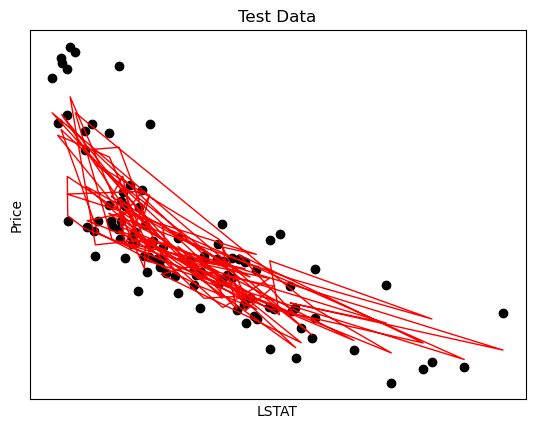

In [19]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
reg_pred_train_k = knn.predict(x_train)
reg_pred_test_k = knn.predict(x_test)
# Plot outputs 
plt.scatter(x_train.LSTAT, y_train,  color='black') 
plt.title('Train Data') 
plt.xlabel('LSTAT') 
plt.ylabel('Price') 
plt.xticks(()) 
plt.yticks(()) 
plt.plot(x_train.LSTAT, reg_pred_train_k, color='red',linewidth=1) 
plt.show()
# Plot outputs 
plt.scatter(x_test.LSTAT, y_test,  color='black') 
plt.title('Test Data') 
plt.xlabel('LSTAT') 
plt.ylabel('Price') 
plt.xticks(()) 
plt.yticks(()) 
plt.plot(x_test.LSTAT, reg_pred_test_k, color='red',linewidth=1) 
plt.show() 

In [20]:
scores_k = []
scores_k.append([round(mean_squared_error(y_train, reg_pred_train_k), 2), round(r2_score(y_train, reg_pred_train_k), 2)])
scores_k.append([round(mean_squared_error(y_test, reg_pred_test_k), 2), round(r2_score(y_test, reg_pred_test_k), 2)])
scores_k = pd.DataFrame(scores_k, columns=['MSE', 'R2'], index=['Training', 'Testing'])
scores_k

,MSE,R2
Training,7.73,0.87
Testing,15.40,0.80


#### Questions:
- Which model is the best one?
- Is the best model is of an acceptable quality?
- Can you use accuracy to assess the quality of these models?

#### Using the same data to solve a classification problem!
- How can I translate a regression problem into a classification problem?

In [21]:
data.MEDV.unique()

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 13.6, 19.6, 15.2, 14.5,
       15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 13.2, 13.1, 13.5, 20. ,
       24.7, 30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 14.4, 19.4, 19.7, 20.5,
       25. , 23.4, 35.4, 31.6, 23.3, 18.7, 16. , 22.2, 33. , 23.5, 22. ,
       17.4, 20.9, 24.2, 22.8, 24.1, 21.4, 20.8, 20.3, 28. , 23.9, 24.8,
       22.5, 23.6, 22.6, 20.6, 28.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.8, 18.8, 18.5, 18.3, 19.2, 17.3, 15.7, 16.2, 18. ,
       14.3, 23. , 18.1, 17.1, 13.3, 17.8, 14. , 13.4, 11.8, 13.8, 14.6,
       15.4, 21.5, 15.3, 17. , 41.3, 24.3, 27. , 22.7, 23.8, 22.3, 19.1,
       29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 37.9, 32.5, 26.4, 29.6, 32. ,
       29.8, 37. , 30.5, 36.4, 31.1, 29.1, 33.3, 30.3, 34.6, 32.9, 42.3,
       48.5, 24.4, 22.4, 28.1, 23.7, 26.7, 30.1, 44.8, 37.6, 46.7, 31.5,
       31.7, 41.7, 48.3, 29. , 25.1, 17.6, 24.5, 26

<Axes: >

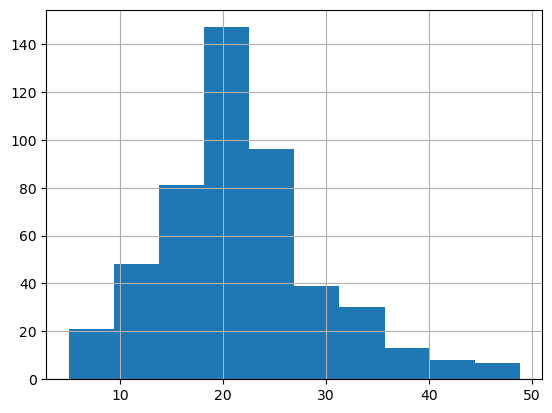

In [22]:
data.MEDV.hist()

#### Revised Problem Definition:
- The goal is to predict the level of housing price values in such a way that 
    - if MEDV <= 15, the level would be low,
    - else if MEDV > 15 and MEDV <= 25, the level would be medium
    - otherwise, the level would be high

In [23]:
data['CLASS'] = np.where(data.MEDV <= 15, 'LOW', np.where(data.MEDV <= 25, 'MEDIUM', 'HIGH'))
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CLASS
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,MEDIUM
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,MEDIUM
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,HIGH
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,HIGH
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,HIGH


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [25]:
data.CLASS.value_counts()

MEDIUM    285
HIGH      108
LOW        97
Name: CLASS, dtype: int64

In [26]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000
mean,3.643241,11.112245,11.113143,0.059184,0.554307,6.245471,68.27898,3.834519,9.514286,408.002041,18.520000,355.855449,12.92402,21.635918
std,8.722154,22.844626,6.821302,0.236209,0.116688,0.653147,28.16479,2.109948,8.691297,168.065190,2.110478,92.634273,7.08318,7.865301
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.90000,1.137000,1.000000,187.000000,12.600000,0.320000,1.98000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.881000,44.55000,2.111050,4.000000,280.250000,17.400000,375.912500,7.34750,16.700000
50%,0.247510,0.000000,9.690000,0.000000,0.538000,6.185000,76.80000,3.275900,5.000000,330.000000,19.100000,391.770000,11.67500,20.900000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.578000,93.87500,5.214600,24.000000,666.000000,20.200000,396.322500,17.11750,24.675000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000,48.800000


In [27]:
label_encoder = preprocessing.LabelEncoder()
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])
new_data = data.drop(columns=['MEDV'])

<Axes: >

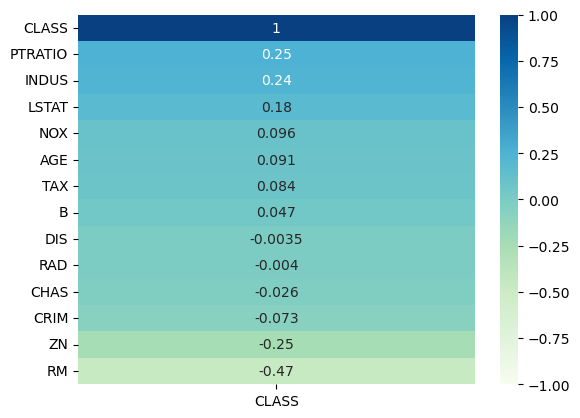

In [28]:
sns.heatmap(new_data.corr()[['CLASS']].sort_values\
            (by='CLASS', ascending=False), vmin=-1, vmax=1, annot=True, cmap='GnBu')

In [29]:
X = new_data.drop(['CLASS'], axis = 1)
Y = new_data.CLASS
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y = Y_train)

KNeighborsClassifier()

In [31]:
train_preds = knn.predict(X=X_train_scaled)
test_preds = knn.predict(X=X_test_scaled)

In [32]:
scores_c = {}
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores_c['training'] = [round(accuracy_score(Y_train, train_preds), 3),\
                     round(precision_score(Y_train, train_preds, average='weighted'), 3),\
                     round(recall_score(Y_train, train_preds, average='weighted'), 3),\
                     round(f1_score(Y_train, train_preds, average='weighted'), 3)]
scores_c['testing'] = [round(accuracy_score(Y_test, test_preds), 3),\
                     round(precision_score(Y_test, test_preds, average='weighted'), 3),\
                     round(recall_score(Y_test, test_preds, average='weighted'), 3),\
                     round(f1_score(Y_test, test_preds, average='weighted'), 3)]
scores_df = pd.DataFrame(scores_c, index=metrics)
scores_df

,training,testing
Accuracy,0.870,0.867
Precision,0.874,0.868
Recall,0.870,0.867
F1-Score,0.869,0.866
